#**Recipe1-Capturing-text-complexity-in-features**

+ Dans cette recette, nous allons capturer la complexité du texte en créant des fonctionnalités très simples qui :

  + compte le nombre de caractères
  + compte le nombre de mots dans le texte
  + compte le nombre de mots uniques
  + détermine la diversité lexicale
  + détermine la taille moyenne des mots

In [1]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
# load text data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


###**Compter le nombre de caractères**

In [2]:
df['num_char'] = df['text'].str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120


In [3]:
# même chose mais en supprimant les espaces blancs de fin de ligne
df['num_char'] = df['text'].str.strip().str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117


###**Compter le nombre de mots**

In [4]:
df['num_words'] = df['text'].str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


In [5]:
# même chose mais en supprimant les espaces blancs de fin de ligne
df['num_words'] = df['text'].str.strip().str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


###**Déterminer le vocabulaire**

In [6]:
df['num_vocab'] = df['text'].str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,96
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,103
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,220
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,97
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,140


In [7]:
# mettre les caractères en minuscules avant de compter les mots uniques

df['num_vocab'] = df['text'].str.lower().str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139


###**Diversité lexicale**

In [8]:
df['lexical_div'] = df['num_words'] / df['num_vocab']

df.head()

,text,num_char,num_words,num_vocab,lexical_div
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216


###**Longueur moyenne des mots**

In [9]:
df['ave_word_length'] = df['num_char'] / df['num_words']

df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581,5.821138
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164


+ Et ce n'est pas tout...
+ Voyons comment la distribution des caractéristiques créées varie selon les différents sujets auxquels le texte fait référence.

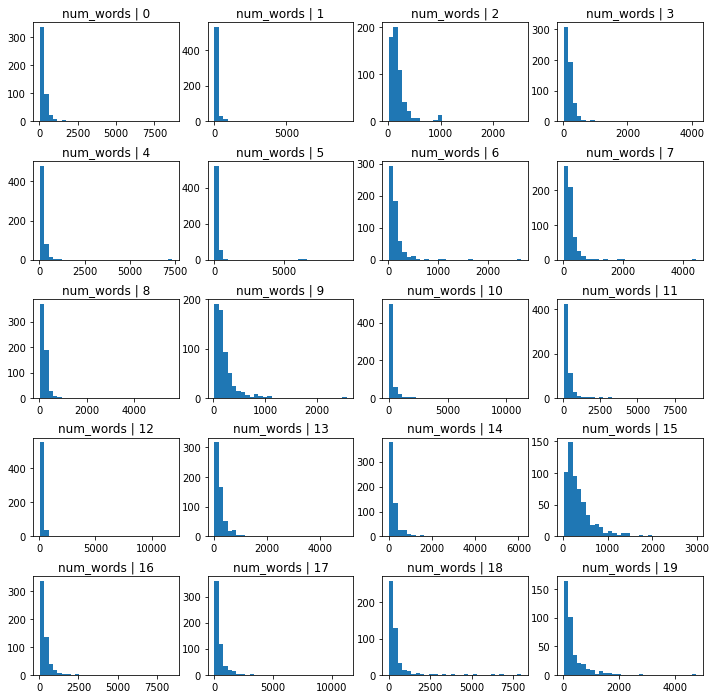

In [10]:
import matplotlib.pyplot as plt

df['target'] = data.target

def plot_features(df, text_var):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target==n][text_var], bins=30)
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n += 1
    plt.show()
    
plot_features(df, 'num_words')

###**Recipe2-Sentence-tokenization**

+ Dans cette recette, nous allons apprendre à compter le nombre de phrases dans un texte.

In [11]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups


text = """
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.
"""

In [14]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# séparer le texte en phrases

sent_tokenize(text)

['\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll.',
 'Please send a brief message detailing\nyour experiences with the procedure.',
 'Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.',
 "I will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll.",
 'Thanks.']

In [16]:
# compter le nombre de phrases

len(sent_tokenize(text))

5

In [17]:
# maintenant nous faisons la même chose pour un cadre de données entier

# Chargement des données
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [18]:
# prenez les 10 premières lignes pour accélérer les choses

df = df.loc[1:10]
df

,text
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...
6,From: bmdelane@quads.uchicago.edu (brian manni...
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...


In [19]:
#  supprimer la première partie de l'email

df['text'] = df['text'].str.split('Lines:').apply(lambda x : x[1])

df

,text
1,11\nNNTP-Posting-Host: carson.u.washington.ed...
2,"36\n\nwell folks, my mac plus finally gave up..."
3,14\nDistribution: world\nNNTP-Posting-Host: a...
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....
6,12\n\nThere were a few people who responded t...
7,44\nDistribution: world\nNNTP-Posting-Host: d...
8,10\n\nI have win 3.0 and downloaded several i...
9,29\n\njap10@po.CWRU.Edu (Joseph A. Pellettier...
10,13\n\nI have a line on a Ducati 900GTS 1978 m...


In [20]:
print(df['text'][1])

 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [21]:
df['num_sent'] = df['text'].apply(sent_tokenize).apply(len)

df

,text,num_sent
1,11\nNNTP-Posting-Host: carson.u.washington.ed...,6
2,"36\n\nwell folks, my mac plus finally gave up...",9
3,14\nDistribution: world\nNNTP-Posting-Host: a...,7
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...,10
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....,21
6,12\n\nThere were a few people who responded t...,8
7,44\nDistribution: world\nNNTP-Posting-Host: d...,15
8,10\n\nI have win 3.0 and downloaded several i...,3
9,29\n\njap10@po.CWRU.Edu (Joseph A. Pellettier...,12
10,13\n\nI have a line on a Ducati 900GTS 1978 m...,11


###**Recipe3-bag-of-words**

In [22]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [23]:
# supprimer la ponctuation et les chiffres

df['text'] = df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# mettre en place un transformateur de sac de mots

vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)

In [25]:
# le transformateur trouve les mots à retenir

vectorizer.fit(df['text'])

CountVectorizer(min_df=0.05, stop_words='english')

In [26]:
X = vectorizer.transform(df['text'])

In [27]:
# créer un bagage de mots dans un cadre de données

bagofwords = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())

bagofwords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'access',
 'actually',
 'ago',
 'apr',
 'article',
 'articleid',
 'ask',
 'available',
 'away',
 'bad',
 'believe',
 'best',
 'better',
 'big',
 'bit',
 'ca',
 'called',
 'case',
 'center',
 'come',
 'computer',
 'control',
 'course',
 'data',
 'david',
 'day',
 'days',
 'department',
 'dept',
 'did',
 'didnt',
 'different',
 'distribution',
 'does',
 'doesnt',
 'doing',
 'dont',
 'drive',
 'email',
 'end',
 'example',
 'fact',
 'far',
 'fax',
 'following',
 'free',
 'general',
 'getting',
 'given',
 'god',
 'going',
 'good',
 'got',
 'government',
 'great',
 'group',
 'hard',
 'having',
 'heard',
 'help',
 'high',
 'home',
 'hope',
 'id',
 'idea',
 'ill',
 'im',
 'info',
 'information',
 'institute',
 'interested',
 'internet',
 'isnt',
 'ive',
 'john',
 'just',
 'keywords',
 'kind',
 'know',
 'large',
 'law',
 'left',
 'let',
 'life',
 'like',
 'line',
 'lines',
 'list',
 'little',
 'long',
 'look',
 'looking',
 'lot',
 'make',
 'makes',
 'man',
 'maybe',
 'mean',
 'means',

###**Recipe4-TFIDF**

In [29]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [30]:
# remove punctuation and numbers
df['text'] = df['text'].str.replace('[^\w\s]','').str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [31]:
# set up Tf-idf transformer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)

In [32]:
# learn words to be retained and their frequency

vectorizer.fit(df['text'])

TfidfVectorizer(min_df=0.05, stop_words='english')

In [33]:
X = vectorizer.transform(df['text'])

In [34]:
# create tf-idf dataframe

tfidf = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())

tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.27302,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.356469,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0
2,0.0,0.135765,0.123914,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.110035,0.000000,0.0,0.0,0.0,...,0.0,0.169635,0.100554,0.0,0.218197,0.233578,0.0,0.00000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.262692,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.120029,0.0,0.000000,0.000000,0.0,0.00000,0.264836,0.0


In [35]:
tfidf.shape

(11314, 191)

In [36]:
# with n grams
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 2),
                             min_df=0.1)

In [37]:
vectorizer.fit(df['text'])

TfidfVectorizer(min_df=0.1, ngram_range=(1, 2), stop_words='english')

In [38]:
X = vectorizer.transform(df['text'])

In [39]:
tfidf = pd.DataFrame(X.toarray(),
                          columns = vectorizer.get_feature_names())

tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,article,believe,better,case,computer,did,distribution,does,doesnt,dont,...,use,used,using,want,way,work,world,writes,writes article,years
0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.374196
1,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.186832,0.0,0.34948,0.0,0.142464,0.284095,0.0,0.259031,...,0.153118,0.0,0.0,0.0,0.158175,0.0,0.000000,0.000000,0.000000,0.000000
3,0.168872,0.0,0.000000,0.0,0.55510,0.0,0.226284,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.260342,0.154322,0.301699,0.000000
4,0.329602,0.0,0.000000,0.0,0.00000,0.0,0.220829,0.000000,0.0,0.200758,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.150602,0.000000,0.000000


In [40]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['article',
 'believe',
 'better',
 'case',
 'computer',
 'did',
 'distribution',
 'does',
 'doesnt',
 'dont',
 'email',
 'going',
 'good',
 'got',
 'help',
 'im',
 'ive',
 'just',
 'know',
 'like',
 'lines',
 'lines article',
 'lines nntppostinghost',
 'make',
 'need',
 'new',
 'nntppostinghost',
 'organization',
 'organization university',
 'people',
 'point',
 'problem',
 'question',
 'read',
 'really',
 'replyto',
 'right',
 'said',
 'say',
 'state',
 'subject',
 'sure',
 'thanks',
 'thing',
 'things',
 'think',
 'time',
 'university',
 'usa',
 'use',
 'used',
 'using',
 'want',
 'way',
 'work',
 'world',
 'writes',
 'writes article',
 'years']

###**Recipe5-cleaning-text**

In [41]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import fetch_20newsgroups
# load data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [42]:
# print example of text

print(df['text'][10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [43]:
# remove punctuation
df["text"] = df['text'].str.replace('[^\w\s]','')


# print example without punctuation

print(df['text'][10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


From irwincmptrclonestarorg Irwin Arnstein
Subject Re Recommendation on Duc
Summary Whats it worth
Distribution usa
Expires Sat 1 May 1993 050000 GMT
Organization CompuTrac Inc Richardson TX
Keywords Ducati GTS How much 
Lines 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock  Runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of 1st with hard accel  The shop will fix trans and oil 
leak  They sold the bike to the 1 and only owner  They want 3495 and
I am thinking more like 3K  Any opinions out there  Please email me
Thanks  It would be a nice stable mate to the Beemer  Then Ill get
a jap bike and call myself Axis Motors

 

Tuba Irwin      I honk therefore I am     CompuTracRichardsonTx
irwincmptrclonestarorg    DoD 0826          R756




In [45]:
# alternative way to remove punctuation
import string
df['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# remove numbers, keep only text

df['text'] = df['text'].str.replace('\d+', '')


# print example without numbers

print(df['text'][10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


From irwincmptrclonestarorg Irwin Arnstein
Subject Re Recommendation on Duc
Summary Whats it worth
Distribution usa
Expires Sat  May   GMT
Organization CompuTrac Inc Richardson TX
Keywords Ducati GTS How much 
Lines 

I have a line on a Ducati GTS  model with k on the clock  Runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of st with hard accel  The shop will fix trans and oil 
leak  They sold the bike to the  and only owner  They want  and
I am thinking more like K  Any opinions out there  Please email me
Thanks  It would be a nice stable mate to the Beemer  Then Ill get
a jap bike and call myself Axis Motors

 

Tuba Irwin      I honk therefore I am     CompuTracRichardsonTx
irwincmptrclonestarorg    DoD           R




In [50]:
# put in lower case

df['text'] = df['text'].str.lower()

# print example in lower case

print(df['text'][10])

from irwincmptrclonestarorg irwin arnstein
subject re recommendation on duc
summary whats it worth
distribution usa
expires sat  may   gmt
organization computrac inc richardson tx
keywords ducati gts how much 
lines 

i have a line on a ducati gts  model with k on the clock  runs
very well paint is the bronzebrownorange faded out leaks a bit of oil
and pops out of st with hard accel  the shop will fix trans and oil 
leak  they sold the bike to the  and only owner  they want  and
i am thinking more like k  any opinions out there  please email me
thanks  it would be a nice stable mate to the beemer  then ill get
a jap bike and call myself axis motors

 

tuba irwin      i honk therefore i am     computracrichardsontx
irwincmptrclonestarorg    dod           r




In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
# supprime les mots d'arrêt

def remove_stopwords(text) :
    stop = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(x for x in text)
    return text

In [56]:
# test function on single text

remove_stopwords(df['text'][10])

'irwincmptrclonestarorg irwin arnstein subject recommendation duc summary whats worth distribution usa expires sat may gmt organization computrac inc richardson tx keywords ducati gts much lines line ducati gts model k clock runs well paint bronzebrownorange faded leaks bit oil pops st hard accel shop fix trans oil leak sold bike owner want thinking like k opinions please email thanks would nice stable mate beemer ill get jap bike call axis motors tuba irwin honk therefore computracrichardsontx irwincmptrclonestarorg dod r'

In [57]:
# apply function to entire dataframe
# (this operation takes a while)

df['text'] = df['text'].apply(remove_stopwords)

# print example text without stopwords

print(df['text'][10])

irwincmptrclonestarorg irwin arnstein subject recommendation duc summary whats worth distribution usa expires sat may gmt organization computrac inc richardson tx keywords ducati gts much lines line ducati gts model k clock runs well paint bronzebrownorange faded leaks bit oil pops st hard accel shop fix trans oil leak sold bike owner want thinking like k opinions please email thanks would nice stable mate beemer ill get jap bike call axis motors tuba irwin honk therefore computracrichardsontx irwincmptrclonestarorg dod r


In [58]:
# Stemming

# http://www.nltk.org/howto/stem.html
# for other stemmers

stemmer = SnowballStemmer("english")

# test stemmer in one word
stemmer.stem('running')

'run'

In [59]:
def stemm_words(text):
    text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(x for x in text)
    return text

In [60]:
# test function on single text

stemm_words(df['text'][10])

'irwincmptrclonestarorg irwin arnstein subject recommend duc summari what worth distribut usa expir sat may gmt organ computrac inc richardson tx keyword ducati gts much line line ducati gts model k clock run well paint bronzebrownorang fade leak bit oil pop st hard accel shop fix tran oil leak sold bike owner want think like k opinion pleas email thank would nice stabl mate beemer ill get jap bike call axi motor tuba irwin honk therefor computracrichardsontx irwincmptrclonestarorg dod r'

In [61]:
# stem entire dataframe
df['text'] = df['text'].apply(stemm_words)

In [62]:
# print example with stemmed words

print(df['text'][10])

irwincmptrclonestarorg irwin arnstein subject recommend duc summari what worth distribut usa expir sat may gmt organ computrac inc richardson tx keyword ducati gts much line line ducati gts model k clock run well paint bronzebrownorang fade leak bit oil pop st hard accel shop fix tran oil leak sold bike owner want think like k opinion pleas email thank would nice stabl mate beemer ill get jap bike call axi motor tuba irwin honk therefor computracrichardsontx irwincmptrclonestarorg dod r
